# Thresholding and Contour Finding

In [10]:
import cv2 as cv
import numpy as np
import requests
from matplotlib import pyplot as plt

## Image import

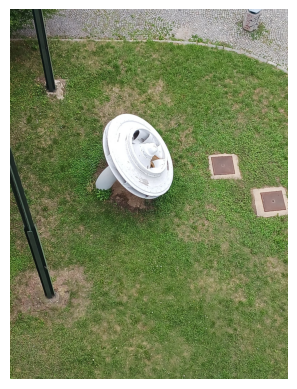

In [11]:
# Image URL
url = "https://d34-a.sdn.cz/d_34/c_img_oc_A/kcukOQcMmDmihgBArD8cUuZ/0d47.jpeg?fl=rot,270,0|res,2200,2200,1"

# Download the image
resp = requests.get(url)

img_array = np.frombuffer(resp.content, np.uint8)

# Decode image (OpenCV reads in BGR)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)

# Convert BGR → RGB for Matplotlib
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display
plt.imshow(img)
plt.axis("off")
plt.show()

## Thresholding

### Global Thresholding (simple binary)

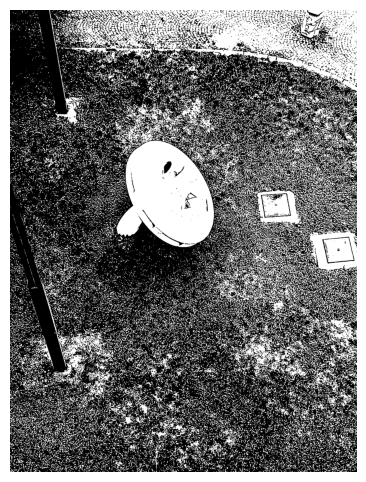

In [12]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

_, th = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
plt.figure(figsize=(6,6))
plt.imshow(th, cmap="gray")
plt.axis("off")
plt.show()

### Adaptive Thresholding

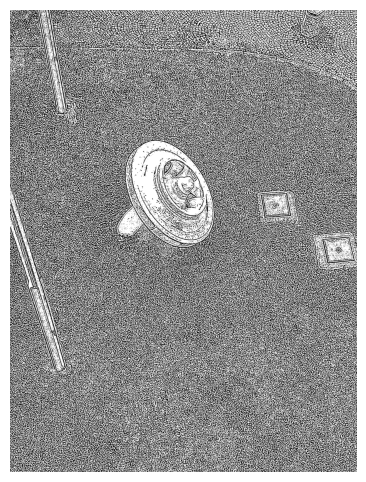

In [13]:
th = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv.THRESH_BINARY, 11, 2)
plt.figure(figsize=(6,6))
plt.imshow(th, cmap="gray")
plt.axis("off")
plt.show()

### Otsu Thresholding

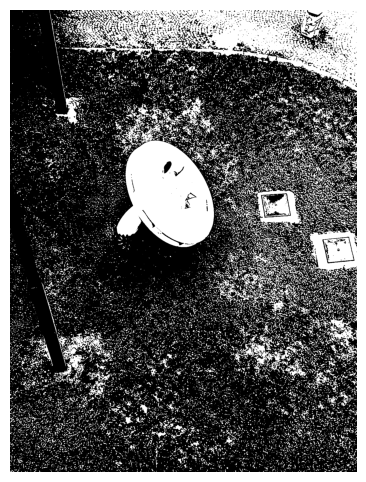

In [17]:
blur = cv.GaussianBlur(gray, (5, 5), 0)
_, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.figure(figsize=(6,6))
plt.imshow(th, cmap="gray")
plt.axis("off")
plt.show()

## Contour Matching

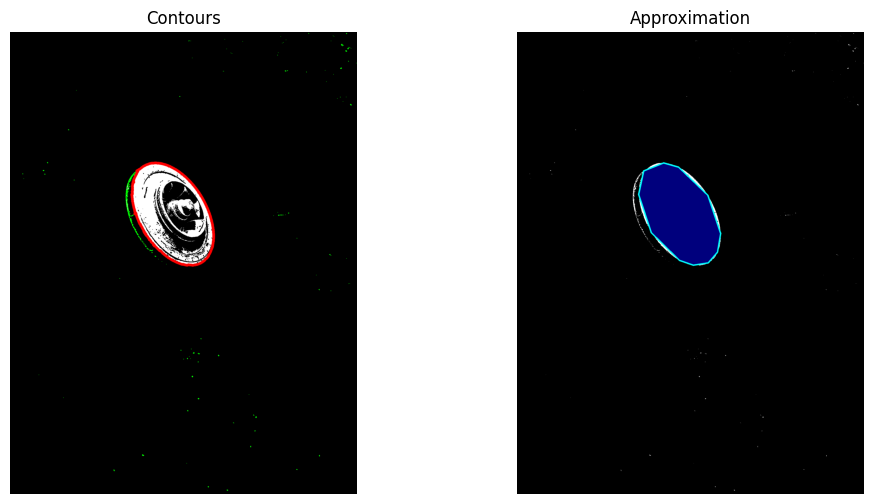

In [18]:
# Example: simple global threshold
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
_, thresh = cv.threshold(gray, 245, 255, cv.THRESH_BINARY)

# Find contours
# RETR_EXTERNAL: only outer contours
# CHAIN_APPROX_SIMPLE: compresses horizontal/vertical segments
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the thresholded image
contour_img = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)  # convert to BGR to draw in color
poly_img = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)
cv.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # green, thickness=2

# Draw largest countour with different colour
largest = max(contours, key=cv.contourArea)
cv.drawContours(contour_img, [largest], -1, (255, 0, 0), 12)


# Display
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(contour_img)
plt.title("Contours")
plt.axis("off")

plt.subplot(122)
# Approximate and draw
epsilon = 0.01 * cv.arcLength(largest, True)  # 2% of the perimeter
approx = cv.approxPolyDP(largest, epsilon, True)
cv.drawContours(poly_img, [approx], -1, (0,0,125), -1)
cv.drawContours(poly_img, [approx], -1, (0,255,255), 5)
plt.imshow(poly_img)
plt.title("Approximation")
plt.axis("off")

plt.show()